## Importing libraries

In [1]:
import os
import torchvision
from torchvision import transforms
from torchvision.transforms.functional import to_tensor, to_pil_image
from PIL import Image

import matplotlib.pyplot as plt

## Counting total datasets

In [2]:
# Path to the folder containing images
folder_path = '../dataset/train/'

total = 0
food_count = {}

for foodname in os.listdir(folder_path):
    for food in os.listdir(os.path.join(folder_path, foodname)):
        total += 1
        if foodname not in food_count:
            food_count[foodname] = 1
        else:
            food_count[foodname] += 1

print(f'Total Food Count: {total}')
print(f'Each Food Count: {food_count}')

Total Food Count: 6912
Each Food Count: {'aalu chop': 363, 'bara': 88, 'bhatmas sadeko': 113, 'biryani': 371, 'buff curry': 57, 'chatamari': 110, 'chhoila': 120, 'chhurpi': 146, 'chicken curry': 264, 'chow mein': 318, 'dalbhat': 217, 'dhau(yogurt)': 118, 'dhido': 210, 'gajar ko halwa': 240, 'gundruk': 102, 'jeri(jalebi)': 246, 'kakro ko achar': 98, 'khaja set': 298, 'khapse': 233, 'kheer': 311, 'kodo ko roti': 76, 'kwati': 133, 'laphing': 243, 'lassi': 332, 'momos': 375, 'pani puri': 247, 'phini roti': 33, 'samosa': 318, 'sekuwa': 184, 'selroti': 245, 'sisnu soup': 49, 'sukuti': 125, 'thukpa': 294, 'yomari': 235}


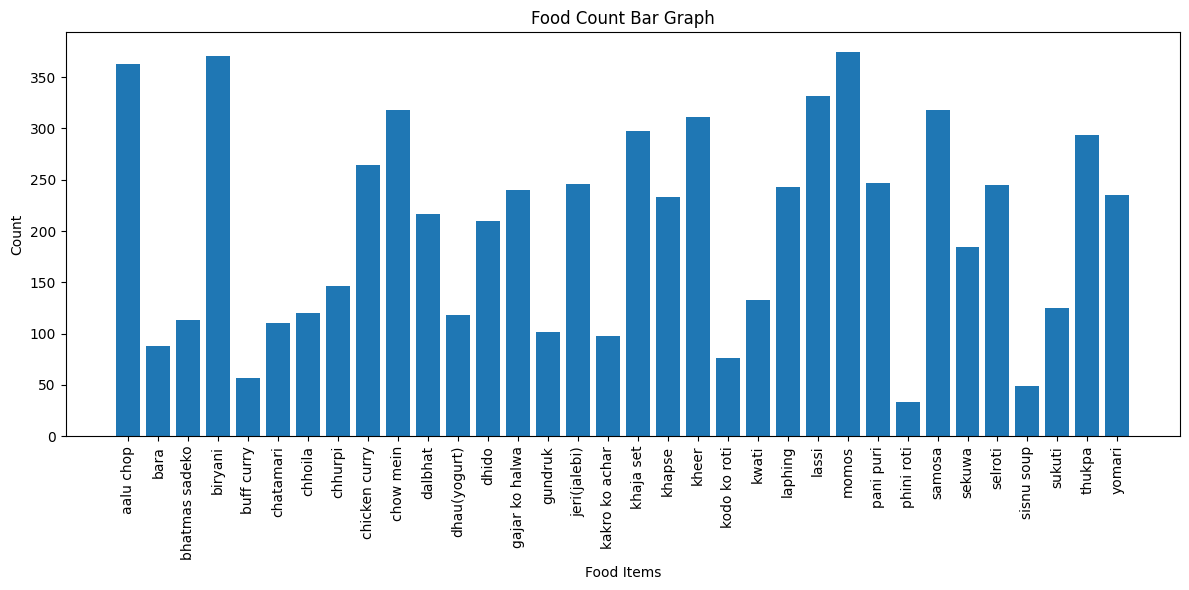

In [3]:
plt.figure(figsize=(12,6))
plt.bar(food_count.keys(), food_count.values())
plt.xlabel('Food Items')
plt.ylabel('Count')
plt.title('Food Count Bar Graph')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

## Augmenting the dataset (according to size)

In [4]:
def normalize_food_size(food_count, total, total_labels):
    ratio = (food_count/total)/(1/total_labels)
    if ratio > 1.3:
        return 5
    elif 0.75 <= ratio <= 1.3:
        return 8
    elif 0.45 < ratio < 0.75:
        return 12
    else:
        return 20

In [5]:
# Define the data augmentation transformations
data_transform = transforms.Compose([
    transforms.RandomRotation(40),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomResizedCrop((224, 224), scale=(0.8, 1.2)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
])

In [6]:
# Path to the folder containing images
folder_path = '../dataset/train/'

for foodname in os.listdir(folder_path):
    for food in os.listdir(os.path.join(folder_path, foodname)):
        img_path = os.path.join(folder_path, foodname, food)
        
        # Load the image using PIL
        img = Image.open(img_path)

        # For data balance
        n = normalize_food_size(food_count[foodname], total, 34)
        
        # Apply transformations
        for i in range(n):
            augmented_img = data_transform(img)
            
            # Convert PIL Image to PyTorch tensor
            tensor_img = to_tensor(augmented_img)
            
            # Save the augmented image
            save_path = f'{os.path.join(folder_path, foodname)}/{food.replace(".jpg", "")}_{i}.jpg'
            torchvision.utils.save_image(tensor_img, save_path)

## Checking datacount after augmenting

In [7]:
# Path to the folder containing images
folder_path = '../dataset/train/'

total_a = 0
food_count_a = {}

for foodname in os.listdir(folder_path):
    for food in os.listdir(os.path.join(folder_path, foodname)):
        total_a += 1
        if foodname not in food_count_a:
            food_count_a[foodname] = 1
        else:
            food_count_a[foodname] += 1

print(f'Total Food Count: {total_a}')
print(f'Each Food Count: {food_count_a}')

Total Food Count: 61164
Each Food Count: {'aalu chop': 2178, 'bara': 1848, 'bhatmas sadeko': 1469, 'biryani': 2226, 'buff curry': 1197, 'chatamari': 1430, 'chhoila': 1560, 'chhurpi': 1898, 'chicken curry': 2376, 'chow mein': 1908, 'dalbhat': 1953, 'dhau(yogurt)': 1534, 'dhido': 1890, 'gajar ko halwa': 2160, 'gundruk': 1326, 'jeri(jalebi)': 2214, 'kakro ko achar': 1274, 'khaja set': 1788, 'khapse': 2097, 'kheer': 1866, 'kodo ko roti': 1596, 'kwati': 1729, 'laphing': 2187, 'lassi': 1992, 'momos': 2250, 'pani puri': 2223, 'phini roti': 693, 'samosa': 1908, 'sekuwa': 1656, 'selroti': 2205, 'sisnu soup': 1029, 'sukuti': 1625, 'thukpa': 1764, 'yomari': 2115}


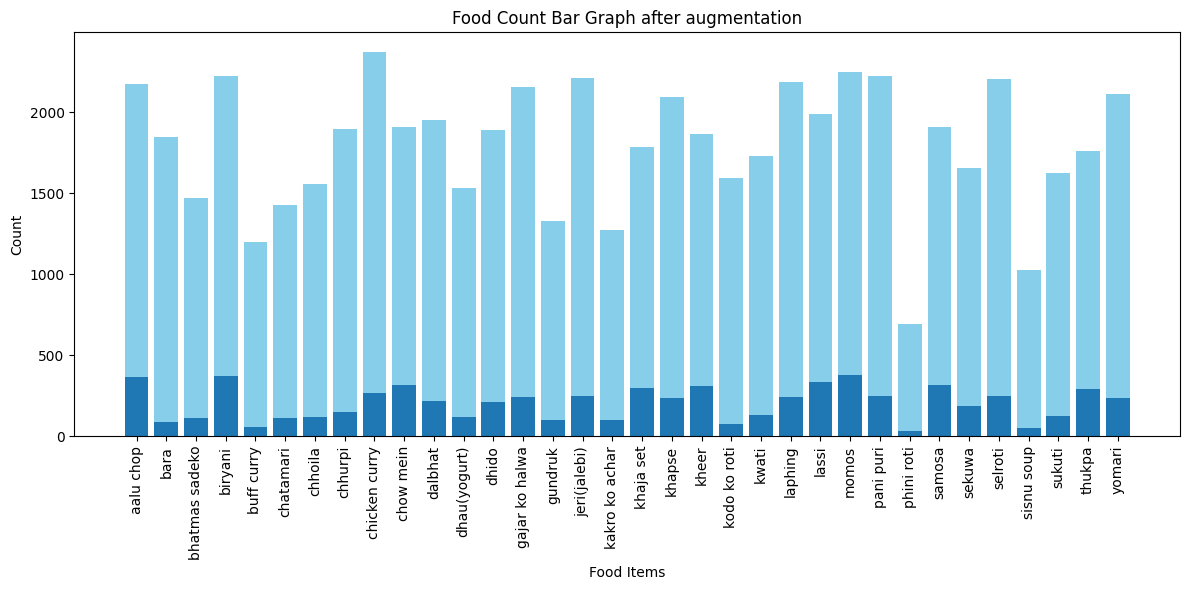

In [12]:
plt.figure(figsize=(12,6))
plt.bar(food_count_a.keys(), food_count_a.values(), color='skyblue')
plt.bar(food_count.keys(), food_count.values())
plt.xlabel('Food Items')
plt.ylabel('Count')
plt.title('Food Count Bar Graph after augmentation')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()